Goal: 
1. Create a mood classifier with TF Keras Sequential API
2. Build a CNN to identify sign language with TF Keras Functional API

In [1]:
# mount google drive. data and utils 
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Coursera/Coursera_DeepLearningSpecialization/course4_coding_assignments/W1A2/

Mounted at /gdrive
/gdrive/My Drive/Coursera/Coursera_DeepLearningSpecialization/course4_coding_assignments/W1A2


In [2]:
!ls

C4WK1A2_CNN_application_Keras.ipynb    datasets		test_utils.py
C4WK1A2_CNN_application_PyTorch.ipynb  images		W1A2_CNN_structure.png
cnn_utils.py			       public_tests.py
Convolution_model_Application.ipynb    __pycache__


In [3]:
import math 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread 
import scipy
from PIL import Image 
import pandas as pd 
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import * 
from test_utils import summary, comparator

In [4]:
tf.__version__

'2.11.0'

In [5]:
# load dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors 
X_train = X_train_orig / 255.
X_test = X_test_orig / 255. 

# Reshape 
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T 

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print(f"number of classes: {len(classes)} {classes}")

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
number of classes: 2 [0 1]


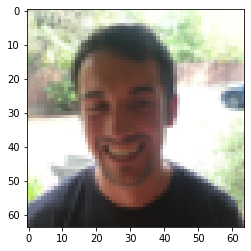

In [6]:
index = 12
plt.imshow(X_train_orig[index])
plt.show()

## Sequential Model

Sequential API is ideal for building models where each layer has exactly one input tensor and one output tensor. It's only appropriate for simple, straightforward tasks. 

In [7]:
def happyModel():
  """
  Returns: 
  TF Keras model 
  """

  model = tf.keras.Sequential([
                               tf.keras.layers.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3), data_format='channels_last'),
                               tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=1),
                               tf.keras.layers.BatchNormalization(axis=3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
  ])
  return model

In [8]:
happy_model = happyModel()
for layer in summary(happy_model):
  print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']


In [9]:
happy_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [11]:
happy_model.fit(X_train, Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 [==============================] - 7s 127ms/step - loss: 0.9047 - accuracy: 0.7567
Epoch 2/10
38/38 [==============================] - 5s 129ms/step - loss: 0.2251 - accuracy: 0.9133
Epoch 3/10
38/38 [==============================] - 7s 176ms/step - loss: 0.1291 - accuracy: 0.9483
Epoch 4/10
38/38 [==============================] - 5s 122ms/step - loss: 0.1057 - accuracy: 0.9567
Epoch 5/10
38/38 [==============================] - 6s 165ms/step - loss: 0.1917 - accuracy: 0.9333
Epoch 6/10
38/38 [==============================] - 5s 142ms/step - loss: 0.0790 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 5s 122ms/step - loss: 0.1178 - accuracy: 0.9550
Epoch 8/10
38/38 [==============================] - 7s 183ms/step - loss: 0.2065 - accuracy: 0.9400
Epoch 9/10
38/38 [==============================] - 5s 122ms/step - loss: 0.0707 - accuracy: 0.9767
Epoch 10/10
38/38 [==============================] - 5s 124ms/step - loss: 0.1561 - accuracy: 0.9400

In [12]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 65ms/step - loss: 0.5702 - accuracy: 0.8000


[0.5701653957366943, 0.800000011920929]

## Functional API

Functional API can handle models with non-linear topology, shared layers, and layers with multiple inputs or outputs. 


In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 5


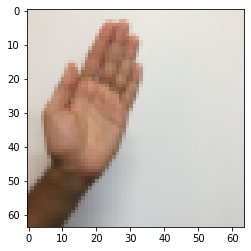

In [14]:
index = 13
plt.imshow(X_train_orig[index])
print(f"y = {np.squeeze(Y_train_orig[:, index])}")

In [15]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Conv_model
- Conv2D: 4 * 4 filter * 8 + padding = "same"
- ReLU
- MaxPool2D: 8 * 8 filter + 8 * 8 stride + padding = "same"
- Conv2D: 2 * 2 filter * 16 + stride = 1 + padding = "same"
- ReLU
- MaxPool2D: 4 * 4 filter + 4 * 4 stride + padding = "same"
- Flatten
- Full-connected (Dense): 6 neurons + softmax

In [16]:
def convolutional_model(input_shape):
  """
  Returns: model
  """
  input_img = tf.keras.Input(shape=input_shape)
  Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4,4), padding="same")(input_img)
  A1 = tf.keras.layers.ReLU()(Z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8,8), padding="same")(A1)
  Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding="same")(P1)
  A2 = tf.keras.layers.ReLU()(Z2)
  P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4), padding="same")(A2)
  F = tf.keras.layers.Flatten()(P2)
  outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

  model = tf.keras.Model(inputs=input_img, outputs = outputs)
  return model

In [18]:
conv_model = convolutional_model((64,64,3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_3 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_4 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs = 100, validation_data = test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 136ms/step - loss: 1.7971 - accuracy: 0.1778 - val_loss: 1.7872 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 2s 133ms/step - loss: 1.7752 - accuracy: 0.2269 - val_loss: 1.7804 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 2s 148ms/step - loss: 1.7668 - accuracy: 0.2694 - val_loss: 1.7737 - val_accuracy: 0.2667
Epoch 4/100
17/17 [==============================] - 4s 228ms/step - loss: 1.7570 - accuracy: 0.3157 - val_loss: 1.7673 - val_accuracy: 0.2750
Epoch 5/100
17/17 [==============================] - 2s 128ms/step - loss: 1.7480 - accuracy: 0.3194 - val_loss: 1.7607 - val_accuracy: 0.2833
Epoch 6/100
17/17 [==============================] - 2s 123ms/step - loss: 1.7352 - accuracy: 0.3380 - val_loss: 1.7483 - val_accuracy: 0.3000
Epoch 7/100
17/17 [==============================] - 2s 129ms/step - loss: 1.7142 - accuracy: 0.3704 - val_loss: 1.7308 - val_accuracy: 0.2833

In [20]:
history.history

{'loss': [1.7970823049545288,
  1.775236964225769,
  1.7668402194976807,
  1.7570414543151855,
  1.7480438947677612,
  1.735154628753662,
  1.7141587734222412,
  1.6877421140670776,
  1.653903841972351,
  1.612270474433899,
  1.5683495998382568,
  1.5212206840515137,
  1.472589373588562,
  1.4223426580429077,
  1.3725197315216064,
  1.326338529586792,
  1.2831381559371948,
  1.240975260734558,
  1.2010729312896729,
  1.163108468055725,
  1.1256370544433594,
  1.0912644863128662,
  1.058565616607666,
  1.0269526243209839,
  0.9981207847595215,
  0.9702247977256775,
  0.9432231783866882,
  0.9179144501686096,
  0.8941764831542969,
  0.8704922199249268,
  0.8475461602210999,
  0.8253816366195679,
  0.80365389585495,
  0.7834052443504333,
  0.7640787959098816,
  0.7452824115753174,
  0.7273719310760498,
  0.7099511623382568,
  0.6933642625808716,
  0.6776057481765747,
  0.6627607941627502,
  0.6481862664222717,
  0.6346948146820068,
  0.621802806854248,
  0.6093968152999878,
  0.5970624089

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

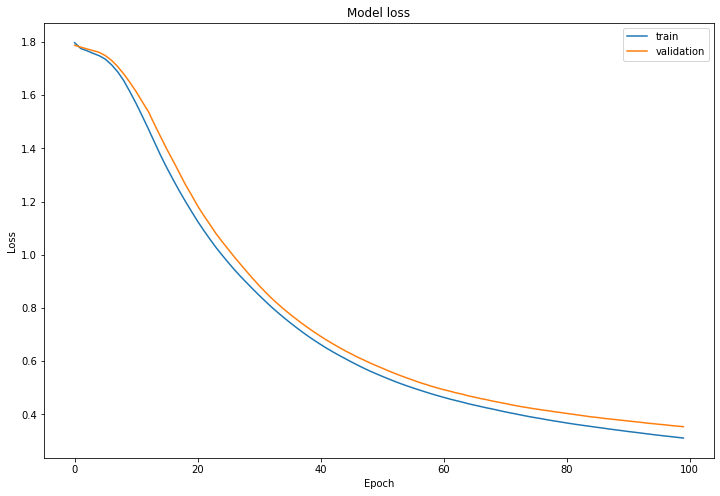

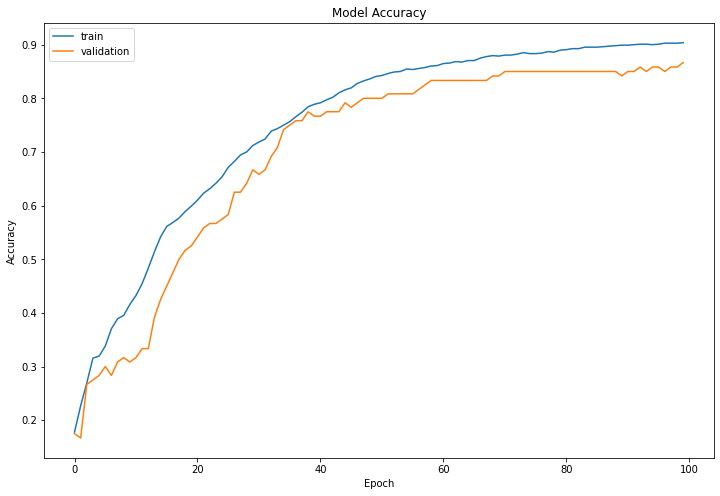

In [21]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')